In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("Euro_2012_stats_TEAM.csv")
data

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Погрупуємо данні за результативністю команд

In [17]:
def classify_goals(goals):
    if goals >= 9:
        return "Висока результативність"
    elif goals >= 4:
        return "Середня результативність"
    else:
        return "Низька результативність"

data['Група результативності'] = data['Goals'].apply(classify_goals)

grouped = data.groupby('Група результативності')['Team'].apply(list).reset_index()

for index, row in grouped.iterrows():
    group = row['Група результативності']
    teams = ", ".join(row['Team'])
    print(f'Група: {group}')
    print(f'Команди: {teams}')
    print()

Група: Висока результативність
Команди: Germany, Spain

Група: Низька результативність
Команди: France, Netherlands, Poland, Republic of Ireland, Ukraine

Група: Середня результативність
Команди: Croatia, Czech Republic, Denmark, England, Greece, Italy, Portugal, Russia, Sweden



Пограємося з візуалізацією

In [18]:
import matplotlib.pyplot as plt


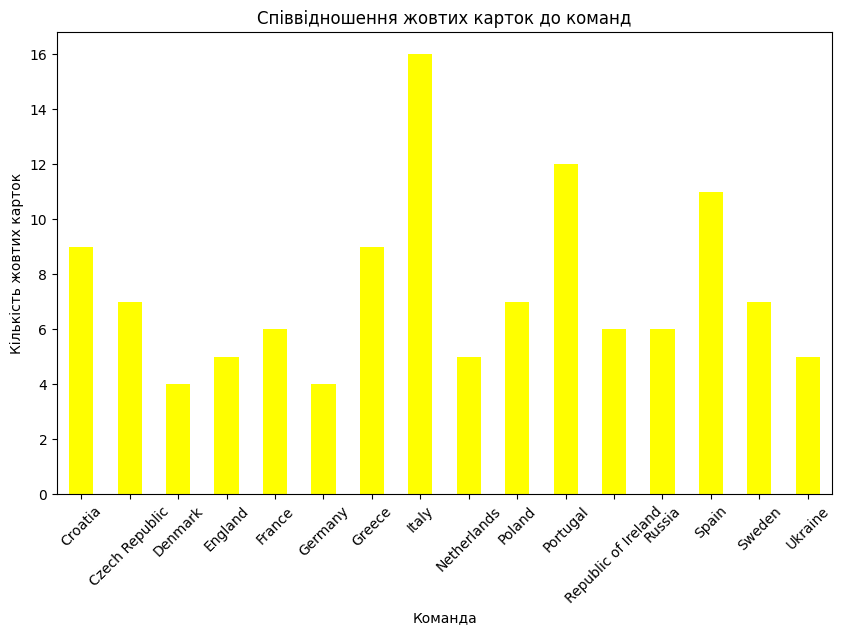

In [27]:
country_yellow_cards = data.groupby('Team')['Yellow Cards'].sum()

plt.figure(figsize=(10, 6))
country_yellow_cards.plot(kind='bar', color='yellow')
plt.title('Співвідношення жовтих карток до команд')
plt.xlabel('Команда')
plt.ylabel('Кількість жовтих карток')
plt.xticks(rotation=45)
plt.show()

Відсортуємо та поглянемо на топ 10 куманд з найкращою точністю ударів

In [22]:
sorted_data = data.sort_values(by='Shooting Accuracy', ascending=False)

top_10_teams = sorted_data.head(10)
print("Топ 10 команд з найкращою точністю ударів:")
for team in top_10_teams['Team']:
    print(team)


Топ 10 команд з найкращою точністю ударів:
Spain
Croatia
Denmark
England
Germany
Sweden
Italy
Czech Republic
Poland
France
